# CS170 Project Notebook

### Imports

In [1]:
import networkx as nx
from parse import read_input_file, write_input_file, write_output_file
from utils import is_valid_network, average_pairwise_distance, average_pairwise_distance_fast
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import random

import solver
from solver import EmployedBee

## Generate Inputs

In [2]:
def randomNGraph(n: int):
    temp = nx.generators.random_graphs.erdos_renyi_graph(n, 5/n)
    while not nx.is_connected(temp):
        temp = nx.generators.random_graphs.erdos_renyi_graph(n, 5/n)

    for (u, v) in temp.edges():
        temp.edges[u, v]['weight'] = round(random.uniform(1/n, n), 2)
    return temp


## Create input files

In [46]:
G25 = randomNGraph(25)
G50 = randomNGraph(50)
G100 = randomNGraph(100)

In [4]:
write_input_file(G25, "./25.in")
write_input_file(G50, "./50.in")
write_input_file(G100, "./100.in")

## Algorithm

### Artificial Bee Colony Algorithms

- Initialisation
   - Each scout bee generates a random connected dominating tree and becomes employed bee. 

- Iteration
   - Each employed bee calls `find_neighbor` to try to find a solution toward its local optimum. 
   - Each onlooker bee randomly chooses two employed bee and choose the bee whose solution has lower cost. The one chosen is called `find_neighbor` again.  
   - If an employed bee solution is not improved over time (e.g. 10 times or so), fire the bee (let the bee find a new solution from scratch). 

- Final Decision
   - Choose an employed bee with lower cost. 

In [24]:
def cost(T, G):
    assert(is_valid_network(G, T))
    return average_pairwise_distance_fast(T)

#### Unit Tests: Test if `random_dominating_tree` (scout) is valid

In [5]:
def testRandomDominatingTree(iterations: int, sub_iterations: int):
    for i in range(iterations):
        r = randomNGraph(100)
        costs = []
        for _ in range(sub_iterations):
            rd = solver.randomDominatingTree(r)
            assert(is_valid_network(r, rd))
            costs.append(round(average_pairwise_distance_fast(rd), 2))
        print("At iteration %d: Initial Costs: %s" % (i, str(costs)))
    print("TEST PASSED: All results are valid network. ")


In [6]:
solver.RANDOMIZED_WEIGHT_VARIATION = 0.3
testRandomDominatingTree(10, 10)

At iteration 0: Initial Costs: [180.55, 160.69, 225.71, 182.0, 179.19, 204.2, 216.46, 159.87, 207.63, 187.77]
At iteration 1: Initial Costs: [192.38, 209.83, 220.81, 200.25, 149.58, 221.51, 161.81, 191.75, 191.53, 196.64]
At iteration 2: Initial Costs: [202.18, 147.68, 155.97, 203.24, 159.56, 260.38, 191.72, 202.01, 140.11, 206.99]
At iteration 3: Initial Costs: [163.38, 156.39, 200.78, 183.34, 218.37, 237.74, 190.8, 187.69, 173.14, 155.88]
At iteration 4: Initial Costs: [189.3, 233.74, 244.24, 129.18, 138.1, 170.3, 144.05, 136.78, 154.57, 169.34]
At iteration 5: Initial Costs: [198.28, 249.96, 224.86, 187.07, 167.9, 262.44, 230.19, 153.55, 263.11, 197.04]
At iteration 6: Initial Costs: [208.69, 181.07, 198.67, 181.34, 200.15, 187.6, 168.86, 190.24, 216.44, 179.8]
At iteration 7: Initial Costs: [192.27, 183.92, 151.66, 203.49, 170.29, 188.52, 163.07, 227.19, 164.19, 154.17]
At iteration 8: Initial Costs: [148.72, 164.87, 148.34, 174.46, 161.96, 190.41, 196.27, 161.01, 169.53, 174.38]
A

In [47]:
T = solver.ABC(G100, 20, 5, 1000, 100, log=True)

At iteration 0, the best cost is 137.064568
At iteration 100, the best cost is 95.765968
At iteration 200, the best cost is 95.113906
At iteration 300, the best cost is 95.113906
At iteration 400, the best cost is 87.338446
At iteration 500, the best cost is 84.730369
At iteration 600, the best cost is 84.730369
At iteration 700, the best cost is 84.730369
At iteration 800, the best cost is 84.730369
At iteration 900, the best cost is 84.730369


In [48]:
b = EmployedBee(G100)
for i in range(10000):
    b.work()

In [49]:
print(cost(nx.minimum_spanning_tree(G100), G100))
print(cost(b.solution, G100))
print(cost(T, G100))

141.6087696969697
124.67068831168834
84.73036862745099


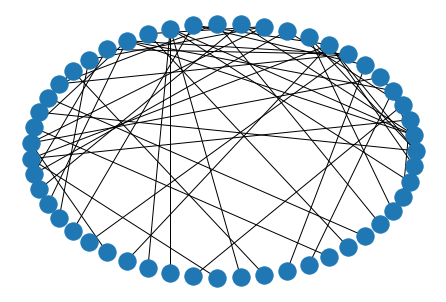

In [50]:
nx.draw_shell(T)

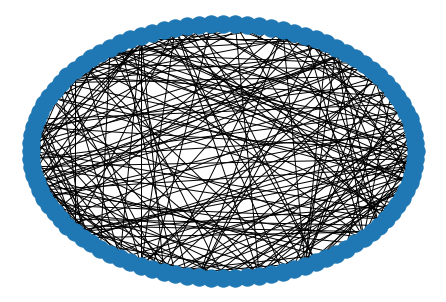

In [51]:
nx.draw_shell(G100)